In [12]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import *

# import basic plot tools
from qiskit.visualization import plot_histogram


from qiskit.providers.fake_provider import FakeJakarta


from qiskit.providers.fake_provider import FakeNairobi

In [4]:
#defining  a function to create the BV Algorithm circuit. Function takes in the oracle and number of qubits and 
# ouputs the quantum circuit 

def BV_algo(oracle,n):
    
    # n input qubits and 1 helper qubit
    qc = QuantumCircuit(n+1,n)
    
    # helper qubit initialised to state ket_1
    qc.x(n)
    
    # creating superposition of all the inputs. and making the state of the helper qubit as ket_minus. 
    for i in range(n+1):
        qc.h(i)
    qc.barrier()
    
    # applying the oracle that has the funciton encoded in it to the circuit 
    qc.append(oracle, range(n+1))
    qc.barrier()
    
    #applying the hadamard gates again to collapse the superposition to one state that has the final result 
    #encoded in it. 
    for i in range(n):
        qc.h(i)
    
    # measuring the input qubits to find the final result. 
    qc.measure(range(n),range(n))
    
    return (qc)
    
    

In [5]:
def bv_oracle(n:int, s:str):
    _circuit_oracle = QuantumCircuit(n+1)
    #reverse the bit string because qiskit uses inverse endianness
    s = s[::-1]
    for _bit_position in range(n):
        if(s[_bit_position] == '1'):
            # phase flippping the helper qubit (as it is in ket_minus state x will phase flip it)
            # flipping phase 
            _circuit_oracle.cx(_bit_position, n)
        else:
            _circuit_oracle.i(_bit_position)

    _gate_oracle = _circuit_oracle.to_gate()
    s = s[::-1]
    _gate_oracle.name = "Oracle\n s: "+str(s)
    return _gate_oracle




In [14]:
# Testing the algorithm for n=3 and a='101') 

n = 3
oracle  = bv_oracle(n, '101')


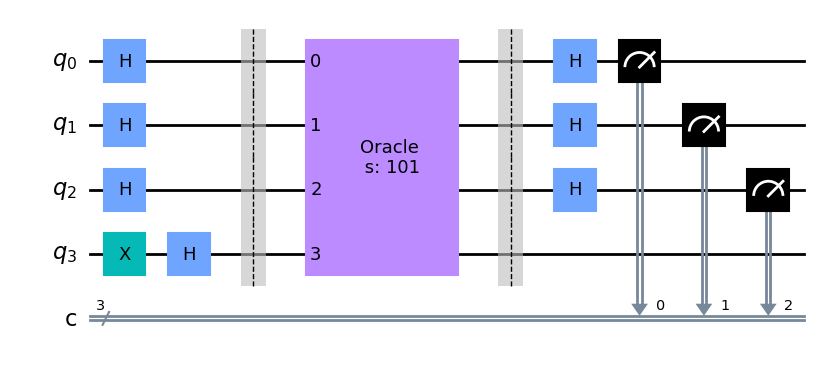

In [15]:
q1 = BV_algo(oracle, n)
q1.draw('mpl')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


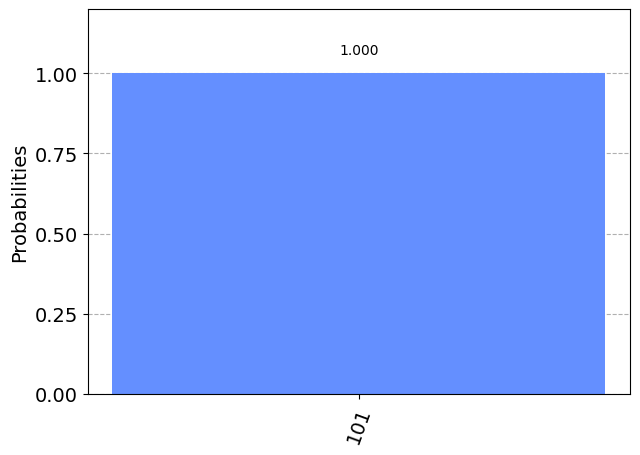

In [16]:
# Running on non-noisy simulator

backend = Aer.get_backend('aer_simulator')
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

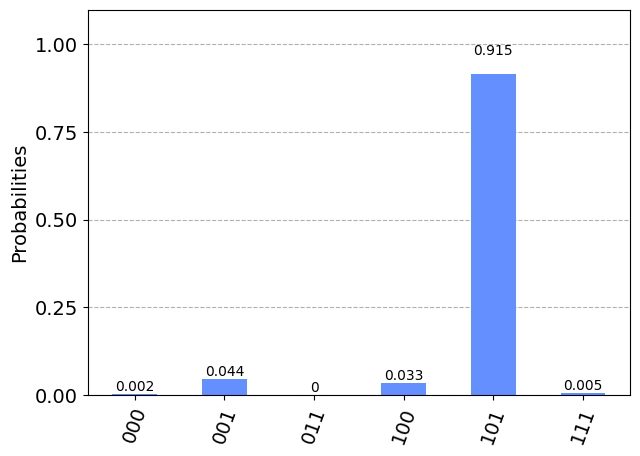

In [17]:
# Running on noisy simulator

backend = FakeJakarta()
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

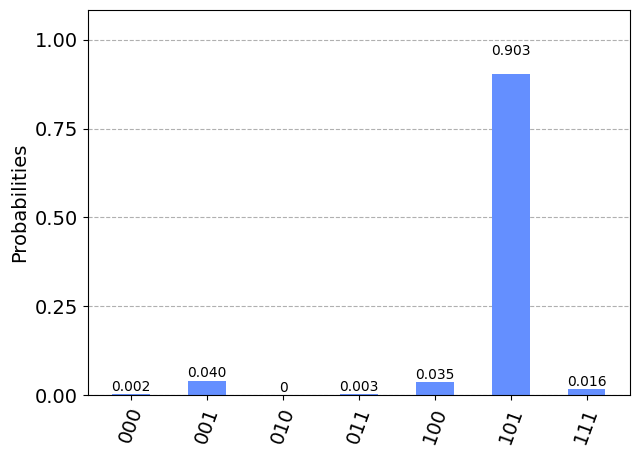

In [18]:
# Running on noisy simulator

backend = FakeNairobi()
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

In [19]:
# Testing the algorithm for n=3 and a='101') 

n = 5
oracle  = bv_oracle(n, '10101')



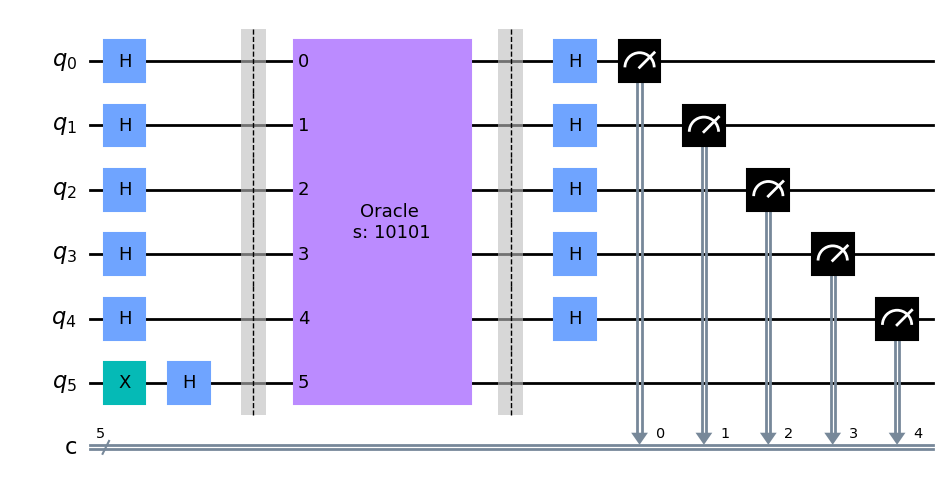

In [20]:
q1 = BV_algo(oracle, n)
q1.draw('mpl')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


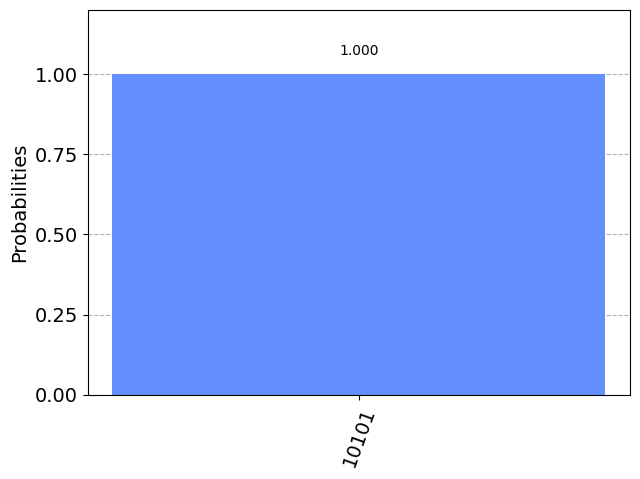

In [21]:
# Running on non-noisy simulator

backend = Aer.get_backend('aer_simulator')
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

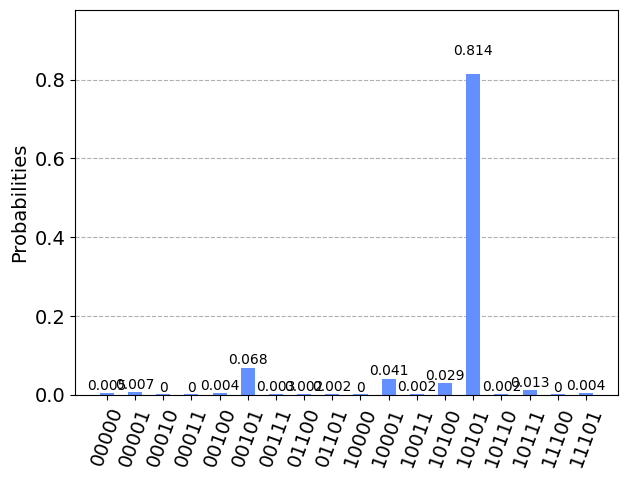

In [22]:
# Running on noisy simulator

backend = FakeJakarta()
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

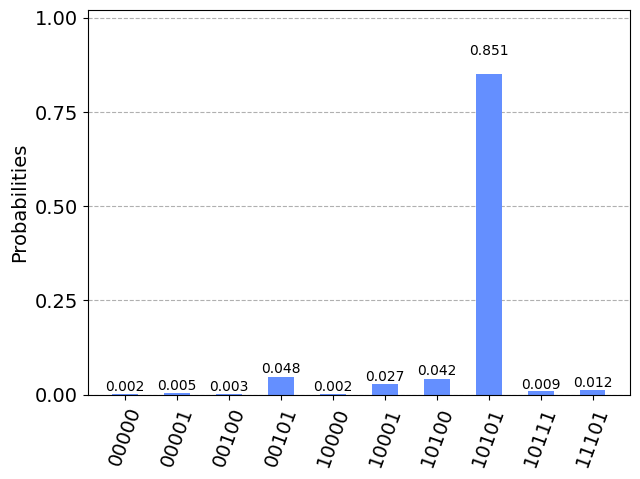

In [23]:
# Running on noisy simulator

backend = FakeNairobi()
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)